In [1]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec

In [71]:
# train_data불러오기
train = pd.read_csv("../../Data/train_data.csv")

In [3]:
train_list = []
for i in range(0, 80):
    train_list.append(train['가사'][i])

In [4]:
len(train_list)

80

---
# 토큰화1

In [5]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[0] != "n":
                r.append(word[0]) # word[0] : data
    rl = (" ".join(r).strip())
    
    results.append(rl)
    #print(rl)

In [6]:
token_list = str(results).split(" ")

In [7]:
import matplotlib.pyplot as plt

In [8]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [9]:
import nltk # national language tool kit
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud

t = Okt()

- 불용어 제거과정

In [10]:
# 불용어 추가
stop_words = []
token_ko1 = [each_word for each_word in token_list if each_word not in stop_words]
#print(token_ko1)

In [11]:
# 상위 50개 단어 확인
ko1 = nltk.Text(token_ko1)
ko1.vocab().most_common(50)

[('하다', 427),
 ('너', 356),
 ('내', 235),
 ('사랑', 211),
 ('있다', 187),
 ('나', 164),
 ('없다', 160),
 ('말', 139),
 ('보다', 128),
 ('이', 126),
 ('수', 122),
 ('그', 114),
 ('날', 107),
 ('그대', 103),
 ('우리', 101),
 ('더', 100),
 ('네', 100),
 ('널', 98),
 ('않다', 85),
 ('못', 83),
 ('같다', 83),
 ('난', 82),
 ('들', 75),
 ('것', 73),
 ('왜', 69),
 ('이별', 69),
 ('게', 66),
 ('나르다', 64),
 ('생각', 63),
 ('아프다', 62),
 ('다', 60),
 ('오다', 59),
 ('걸', 59),
 ('다시', 57),
 ('잊다', 56),
 ('되다', 54),
 ('싶다', 54),
 ('맘', 54),
 ('너무', 53),
 ('해', 52),
 ('밤', 52),
 ('시간', 50),
 ('내다', 50),
 ('알', 47),
 ('때', 46),
 ('이제', 46),
 ('사람', 46),
 ('마음', 45),
 ('보고', 44),
 ('좋다', 43)]

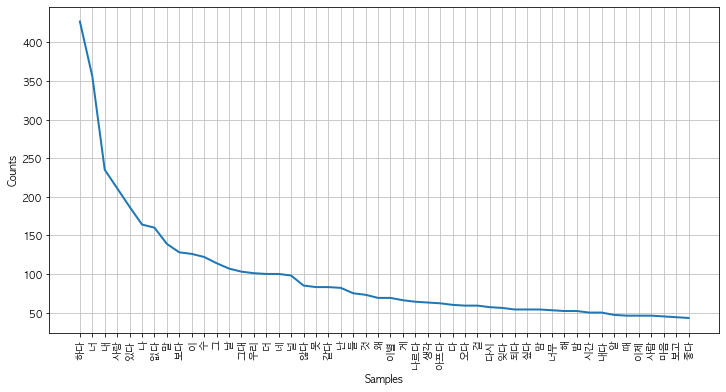

In [12]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko1.plot(50)
plt.show()

In [13]:
# 상위 50개만 wordcloud로 그리기
# 구한데이터로 그리기
data1 = ko1.vocab().most_common(50)

# 딕셔너리로 만들기
tmp_data1 = dict(data1)

wordcloud1 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data1)

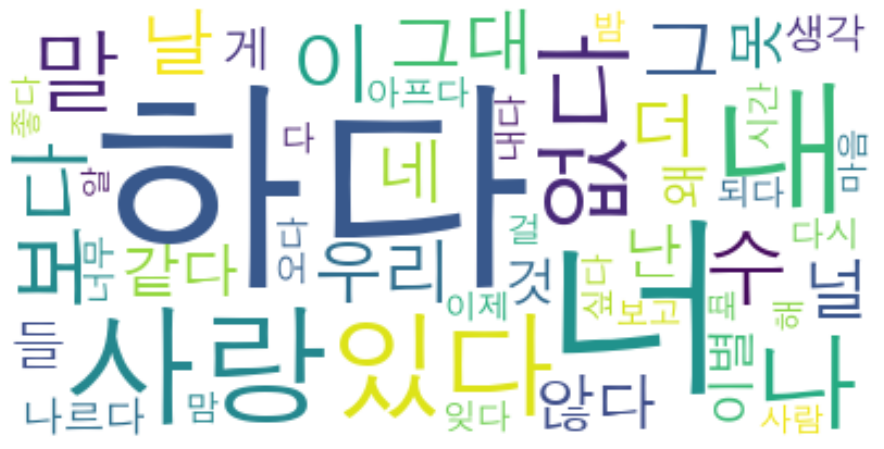

In [14]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

> 단어 분리과정 중 감정에대한 단어 판단할 기준이 모호해 다른방법으로 형태소분리를 적용해보겠습니다.

---
# 토큰화 2

In [15]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results2 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=False,stem=False) # 단어의 기본형 사용안함
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[0] != "n":
                r.append(word[0])
    rl2 = (" ".join(r).strip())
    
    results2.append(rl2)
    #print(rl)

In [17]:
token_list2 = str(results2).split(" ")


- 불용어 체크 2

In [18]:
# 불용어 추가
stop_words2 = []
token_ko2 = [each_word for each_word in token_list2 if each_word not in stop_words2]


In [19]:
# 상위 50개 단어 확인
ko2 = nltk.Text(token_ko2)
ko2.vocab().most_common(50)

[('너', 356),
 ('내', 235),
 ('사랑', 211),
 ('나', 164),
 ('말', 139),
 ('수', 122),
 ('이', 120),
 ('그', 116),
 ('날', 107),
 ('그대', 103),
 ('우리', 101),
 ('더', 100),
 ('네', 100),
 ('널', 98),
 ('해', 90),
 ('못', 83),
 ('난', 82),
 ('들', 78),
 ('왜', 69),
 ('이별', 69),
 ('것', 67),
 ('나를', 64),
 ('생각', 63),
 ('게', 63),
 ('걸', 61),
 ('다', 60),
 ('다시', 57),
 ('맘', 54),
 ('너무', 53),
 ('밤', 52),
 ('봐', 51),
 ('시간', 50),
 ('없는', 50),
 ('알', 47),
 ('때', 46),
 ('이제', 46),
 ('내게', 46),
 ('사람', 46),
 ('마음', 45),
 ('한', 45),
 ('보고', 44),
 ('할', 42),
 ('눈', 42),
 ('오늘', 39),
 ('젠', 39),
 ('속', 38),
 ('아직', 38),
 ('I', 37),
 ('기억', 36),
 ('같아', 36)]

> 감정이 단어의 기본형만으로 느낄수 없어 기본형으로 변형하지 않고 형태소 분리를 하였더니 전혀 판단할 수 없는 데이터가 추출되었습니다.  
> 감정을 판단할때 동사가 더 직관적으로 알 수 있을것 같아서 동사만 추출해보겠습니다.

---
# 동사토큰

In [20]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results3 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if word[1] in ["Verb"]:
            if word[0] != "n":
                r.append(word[0])
    rl3 = (" ".join(r).strip())
    
    results3.append(rl)
    #print(rl)

In [21]:
token_list3 = str(results3).split(" ")

In [22]:
# 불용어 추가
stop_words3 = ['하다','찬','나','너','걸','수','다시다','내','고서','안','거','그','누구','보나','두','알','코','이','젠'\
                ,'난','해','널',',',"''",'곳',"안녕',","젤","'나르다","나다",'내다','잘',"그대","사람","하나요","안녕']"\
                ,"['나르다",
                ]
token_ko3 = [each_word for each_word in token_list3 if each_word not in stop_words3]


In [23]:
# 상위 100개 단어 확인
ko3 = nltk.Text(token_ko3)
ko3.vocab().most_common(100)

[('사랑', 720),
 ('안녕', 320),
 ('더', 240),
 ('아프다', 240),
 ('같다', 160),
 ('이미', 160),
 ('있다', 160),
 ('이별', 160),
 ('나르다', 160),
 ('만들다', 160),
 ('노래', 160),
 ('끝', 160),
 ('슬프다', 160),
 ('다시', 160),
 ('생각', 160),
 ('척', 160),
 ('아니다', 80),
 ('배우다', 80),
 ('않다', 80),
 ('늘', 80),
 ('더디다', 80),
 ('서두르다', 80),
 ('오다', 80),
 ('거리', 80),
 ('눈물', 80),
 ('짓다', 80),
 ('원래', 80),
 ('결국', 80),
 ('그땐', 80),
 ('없다', 80),
 ('바람', 80),
 ('불어오다', 80),
 ('붉다', 80),
 ('불다', 80),
 ('혼자', 80),
 ('솔직하다', 80),
 ('끝내', 80),
 ('말', 80),
 ('자리', 80),
 ('돌아오다', 80),
 ('상처', 80),
 ('받다', 80),
 ('너무', 80),
 ('두다', 80),
 ('여전하다', 80),
 ('가끔', 80),
 ('우연히', 80),
 ('만나다', 80),
 ('그냥', 80),
 ('모르다', 80),
 ('지나가다', 80),
 ('지우다', 80),
 ('끝나다', 80)]

In [33]:
len(ko3.vocab())

53

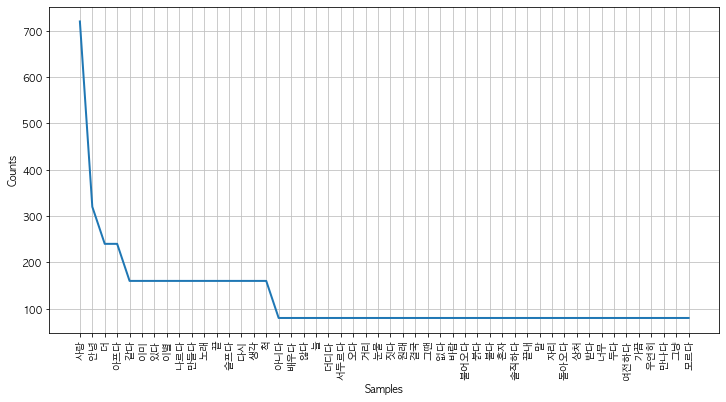

In [34]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko3.plot(50)
plt.show()

In [35]:
# 상위 200개만 wordcloud로 그리기
# 구한데이터로 그리기
data3 = ko3.vocab().most_common(200)

# 딕셔너리로 만들기
tmp_data3 = dict(data3)

wordcloud3 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data3)

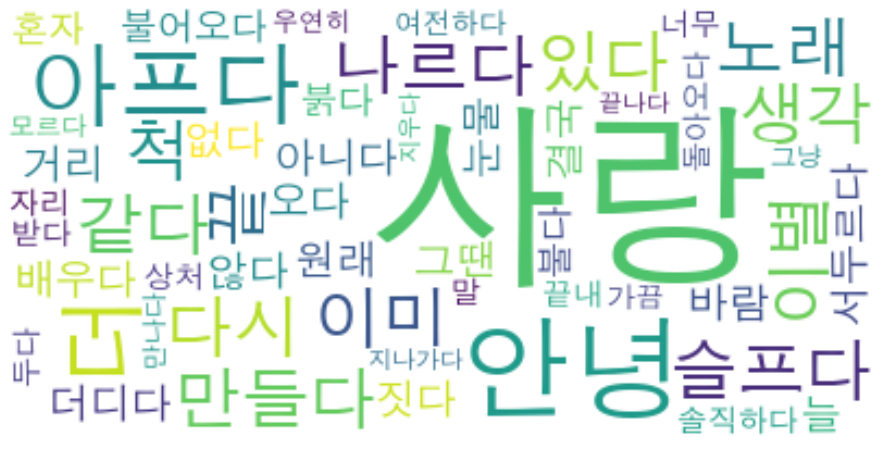

In [36]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 명사 토큰

In [ ]:
# train_malist

In [39]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results4 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[1] in ["Noun"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl4 = (" ".join(r).strip())
    
    results4.append(rl4)
    #print(rl)

In [40]:
token_list4 = str(results4).split(" ")

In [46]:
# 명사갯수 (중복포함)
len(token_list4)

6680

In [47]:
# 불용어 추가
stop_words4 = ['내','너','네','우리','널','그대','넌','곳','나','수',"속","젠","게","알","해","거","미","일","우린","니","젠","때","알","걸"\
                "두","손","눈","것","이","두","볼","어디","하나요","아무","길","좀","뒤","척","안","마","모두","여기","건","비","품","번","줄"\
                ,"난난","살","그","더","난","사람","걸","'너","나나","땐","적","저기","채","입","그것","위","해도","수가","둘",\
                "듯","수',","사랑',","롤","요","저","감","'사랑","다시',","라면","은","뭐","땜","워","준","불","뿐","서서","순","울",\
                "우릴","남","발","춤","일도","란","전","온","중","말',","대도","만","낼","빈","오지","덜","방","무","진","투","드","돌",\
                "바랬는데","빗","오","보","거지","후","핀","잡","부시","거더","알',","게',","'혼자","수도","우리둘","래야","통해","'하루",\
                "애","아들","더욱더","전하","무엇","끝내기","티","겉","헤어지자","사이',","'나","'내","더',","굽","녹","테","세","'오늘",\
                "것',","'그대","그대',","너',","날',","친구","내겐","단","다가","누가","듯이","안고","물","활","첫","목","픈","바","몇",\
                "쉬","철","나라","죽","찬","지고","나로","감고","보이","운","다한","룰","식이","이면","날수","남지","만이","째깍","번이","날"
                ]
token_ko4 = [each_word for each_word in token_list4 if each_word not in stop_words4]
ko4 = nltk.Text(token_ko4)

- 명사의 경우 명사의 갯수가 1개인 경우가 총 402번이였으며 특수기호 포함이 가장 많이 들어있음을 확인하고 1번 사용된 명사는 토큰에서 제외

In [48]:
testing = []
for key, val in zip(list(ko4.vocab().keys()),list(ko4.vocab().values())):
    if val < 2:
        testing.append([key,val])

In [50]:

len(testing)

402

In [51]:
testing2 = []
for i in range(len(testing)):
    testing2.append(str(testing[i][0]))

In [53]:
# 1번 사용된 언어 지운후 다시 확인
token_ko5 = set(ko4.vocab()) - set(testing2)
token_ko6 = [each_word for each_word in token_list4 if each_word in token_ko5]
ko6 = nltk.Text(token_ko6)
ko6.vocab().most_common(500)

[('사랑', 204),
 ('말', 133),
 ('왜', 69),
 ('이별', 68),
 ('생각', 62),
 ('맘', 54),
 ('다시', 53),
 ('밤', 52),
 ('시간', 50),
 ('못', 49),
 ('이제', 46),
 ('마음', 44),
 ('보고', 43),
 ('오늘', 39),
 ('기억', 36),
 ('혼자', 35),
 ('그때', 33),
 ('끝', 32),
 ('눈물', 32),
 ('곁', 30),
 ('모습', 30),
 ('하루', 30),
 ('추억', 30),
 ('또', 30),
 ('모든', 29),
 ('정말', 29),
 ('혹시', 28),
 ('서로', 26),
 ('그날', 25),
 ('지금', 25),
 ('처음', 24),
 ('매일', 22),
 ('가슴', 22),
 ('세상', 22),
 ('꼭', 22),
 ('순간', 19),
 ('바람', 19),
 ('자꾸', 18),
 ('하나', 18),
 ('잠', 17),
 ('항상', 17),
 ('햇살', 16),
 ('멀리', 16),
 ('그게', 15),
 ('그냥', 15),
 ('후회', 15),
 ('다른', 14),
 ('전부', 14),
 ('노래', 14),
 ('그땐', 14),
 ('잡고', 13),
 ('사이', 13),
 ('소리', 13),
 ('남아', 13),
 ('만큼', 13),
 ('꿈', 12),
 ('노력', 12),
 ('사실', 12),
 ('조금', 12),
 ('마지막', 11),
 ('늘', 11),
 ('준비', 11),
 ('바보', 11),
 ('그녀', 11),
 ('술잔', 11),
 ('자꾸만', 10),
 ('반짝', 10),
 ('약속', 10),
 ('이해', 10),
 ('상처', 10),
 ('가끔', 9),
 ('옆', 9),
 ('점점', 9),
 ('글자', 9),
 ('얼굴', 9),
 ('귓가', 9),
 ('자리', 9),
 ('크리스마스', 9),


In [57]:
# 명사 토큰 갯수 (중복제외)
len(list(ko6.vocab()))

329

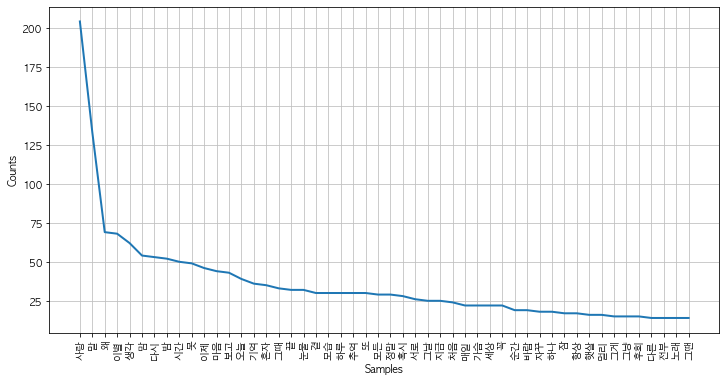

In [58]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko6.plot(50)
plt.show()

In [59]:
# 상위 100개만 wordcloud로 그리기
# 구한데이터로 그리기
data4 = ko6.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data4 = dict(data4)

wordcloud4 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data4)

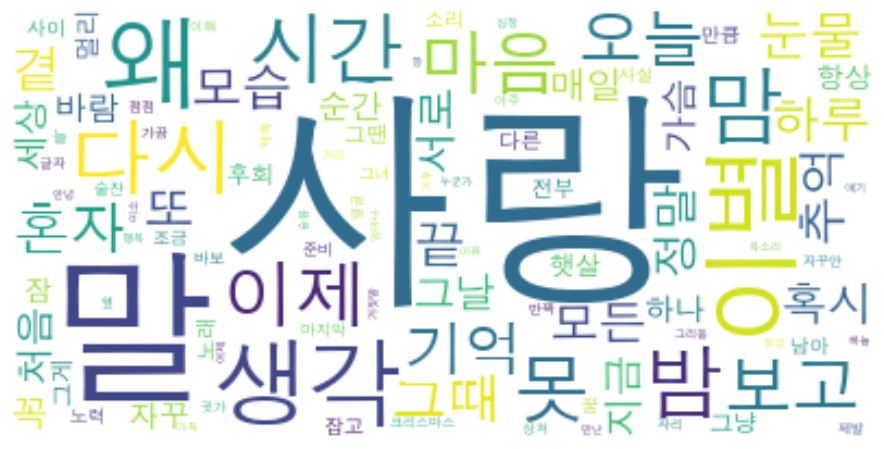

In [60]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 추출한 토큰 확인하기

In [61]:
# 동사 토큰, 명사 토큰
print("동사토큰 : ",list(ko3.vocab()),"\n 명사토큰 : ",list(ko6.vocab()))

동사토큰 :  ['사랑', '안녕', '더', '아프다', '같다', '이미', '있다', '이별', '나르다', '만들다', '노래', '끝', '슬프다', '다시', '생각', '척', '아니다', '배우다', '않다', '늘', '더디다', '서두르다', '오다', '거리', '눈물', '짓다', '원래', '결국', '그땐', '없다', '바람', '불어오다', '붉다', '불다', '혼자', '솔직하다', '끝내', '말', '자리', '돌아오다', '상처', '받다', '너무', '두다', '여전하다', '가끔', '우연히', '만나다', '그냥', '모르다', '지나가다', '지우다', '끝나다'] 
 명사토큰 :  ['사랑', '말', '왜', '이별', '생각', '맘', '다시', '밤', '시간', '못', '이제', '마음', '보고', '오늘', '기억', '혼자', '그때', '끝', '눈물', '곁', '모습', '하루', '추억', '또', '모든', '정말', '혹시', '서로', '그날', '지금', '처음', '매일', '가슴', '세상', '꼭', '순간', '바람', '자꾸', '하나', '잠', '항상', '햇살', '멀리', '그게', '그냥', '후회', '다른', '전부', '노래', '그땐', '잡고', '사이', '소리', '남아', '만큼', '꿈', '노력', '사실', '조금', '마지막', '늘', '준비', '바보', '그녀', '술잔', '자꾸만', '반짝', '약속', '이해', '상처', '가끔', '옆', '점점', '글자', '얼굴', '귓가', '자리', '크리스마스', '아주', '제발', '얼마나', '행복', '하늘', '만난', '가득', '얘기', '안녕', '그리움', '미소', '심장', '겨우', '향', '슬픔', '거리', '목소리', '일상', '거짓말', '이유', '어제', '누군가', '종일', '만날', '마치', '영화', '이상', '번호', '마주', '오직',

In [70]:
print(len(list(ko3.vocab())),len(list(ko6.vocab())),"\nsum :",
        len(list(ko3.vocab()))+len(list(ko6.vocab())))

53 329 
sum : 382


In [66]:
token_sum = list(ko3.vocab())+list(ko6.vocab())

---
# 토큰 one hot

In [76]:
from tensorflow import keras

- 가사 데이터 okt로 분류하기

In [134]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result = []
lines = train['가사']
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if word[1] in ["Verb","Noun"]:
            if word[0] != "n":
                r.append(word[0])
    rl3 = (" ".join(r).strip())
    
    okt_result.append(rl3)
    # print(rl3)

In [136]:
#okt_result

In [142]:
# 인덱스 0과 1은 다른 용도로 남겨두고 나머지 단어들은 2부터 105까지 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 2 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 1 # 패딩용 인덱스 1
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [147]:
print((encoded[0]))

[85, 0, 0, 0, 0, 361, 10, 378, 0, 377, 0, 0, 265, 0, 0, 0, 213, 378, 0, 346, 0, 0, 196, 0, 327, 349, 0, 105, 263, 0, 0, 257, 0, 367, 0, 378, 0, 343, 0, 364, 378, 0, 235, 149, 0, 345, 0, 0, 368, 0, 0, 77, 378, 0, 357, 0, 301, 378, 0, 174, 0, 0, 77, 378, 0, 79, 0, 378, 0, 345, 0, 0, 364, 378, 0, 0, 378, 0, 173, 10, 378, 0, 342, 173, 0, 376, 0, 0, 0, 0, 0, 344, 0, 0, 261, 0, 0, 322, 377, 378, 0, 0, 77, 378, 0, 0, 0, 378, 0, 257, 0, 0, 0, 0, 346, 0, 0, 290, 382, 261, 0, 205, 358, 0, 336, 378, 0, 298, 0, 74, 0, 212, 0, 0, 0, 166, 0, 0, 378, 0, 336, 378, 0, 261, 0, 0, 303, 0, 199, 263, 0, 259, 322, 0, 0, 0, 378, 0, 0, 0, 330, 0, 0, 378, 0, 166, 0, 343, 77, 378, 0, 96, 0, 0, 350, 0, 0, 346, 0, 0, 378, 0, 0, 79, 292, 0, 244, 0, 0, 77, 378, 0, 0, 0, 0, 364, 378, 0, 166, 0, 327, 0, 0, 378, 0, 378, 0, 301, 378, 0, 364, 0, 0, 290, 0, 0, 378, 0, 244, 0, 328, 179, 0, 0, 378, 0, 0, 77, 378, 0, 0, 0, 378, 0, 257, 0, 0, 0, 0, 346, 0, 0, 290, 382, 261, 0, 205, 358, 0, 336, 378, 0, 298, 0, 74, 0, 212, 0,

---
# 전체 길이 padding작업

In [148]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 558
가사의 최소 길이 : 184
가사의 평균 길이 : 349.300000


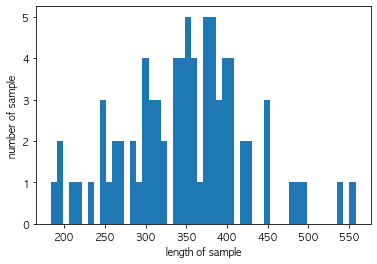

In [149]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_len = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_len)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [150]:
# 모든 리뷰의 길이를 558으로 통일
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [151]:
print(encoded[0])

[85, 0, 0, 0, 0, 361, 10, 378, 0, 377, 0, 0, 265, 0, 0, 0, 213, 378, 0, 346, 0, 0, 196, 0, 327, 349, 0, 105, 263, 0, 0, 257, 0, 367, 0, 378, 0, 343, 0, 364, 378, 0, 235, 149, 0, 345, 0, 0, 368, 0, 0, 77, 378, 0, 357, 0, 301, 378, 0, 174, 0, 0, 77, 378, 0, 79, 0, 378, 0, 345, 0, 0, 364, 378, 0, 0, 378, 0, 173, 10, 378, 0, 342, 173, 0, 376, 0, 0, 0, 0, 0, 344, 0, 0, 261, 0, 0, 322, 377, 378, 0, 0, 77, 378, 0, 0, 0, 378, 0, 257, 0, 0, 0, 0, 346, 0, 0, 290, 382, 261, 0, 205, 358, 0, 336, 378, 0, 298, 0, 74, 0, 212, 0, 0, 0, 166, 0, 0, 378, 0, 336, 378, 0, 261, 0, 0, 303, 0, 199, 263, 0, 259, 322, 0, 0, 0, 378, 0, 0, 0, 330, 0, 0, 378, 0, 166, 0, 343, 77, 378, 0, 96, 0, 0, 350, 0, 0, 346, 0, 0, 378, 0, 0, 79, 292, 0, 244, 0, 0, 77, 378, 0, 0, 0, 0, 364, 378, 0, 166, 0, 327, 0, 0, 378, 0, 378, 0, 301, 378, 0, 364, 0, 0, 290, 0, 0, 378, 0, 244, 0, 328, 179, 0, 0, 378, 0, 0, 77, 378, 0, 0, 0, 378, 0, 257, 0, 0, 0, 0, 346, 0, 0, 290, 382, 261, 0, 205, 358, 0, 336, 378, 0, 298, 0, 74, 0, 212, 0,

In [106]:
# 분류항목['happy', 'sad', 'regret', 'indifference']를 수치로 변경하기
categories = train['감정'].to_list()

def category_encoding(category):
    if category == 'happy':
        return [1,0,0,0]
    elif category == 'sad':
        return [0,1,0,0]
    elif category == 'regret':
        return [0,0,1,0]
    else:
        return [0,0,0,1]

In [107]:
encoded_category = [category_encoding(category) for category in categories]
encoded_category

[[1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0,

In [108]:
# Feature 확인하기
print(encoding[0])

[3607, 3150, 3259, 624, 3186, 1169, 2178, 2360, 2696, 3049, 1155, 3150, 3252, 1577, 716, 3143, 1705, 507, 544, 3049, 1359, 444, 2758, 2686, 3070, 682, 2568, 1758, 2274, 798, 605, 444, 781, 2518, 2288, 1698, 106, 238, 3301, 232, 3150, 1155, 3150, 1330, 485, 3110, 1462, 1520, 3358, 3150, 1155, 3150, 2811, 828, 3049, 1246, 1866, 162, 3520, 2627, 3607, 3150, 2150, 3124, 3049, 1579, 1467, 3250, 3188, 2014, 860, 1155, 3150, 3370, 3049, 2811, 2164, 158, 3267, 1268, 531, 891, 1577, 34, 3049, 2162, 565, 2142, 3574, 3503, 1730, 3010, 3267, 2354, 786, 2285, 2479, 2180, 1345, 1654, 498, 832, 1646, 3381, 1862, 3049, 3150, 1155, 3150, 1330, 485, 3110, 1462, 1520, 3358, 3150, 1155, 3150, 2811, 828, 3049, 1246, 1866, 162, 3520, 2627, 624, 3259, 1862, 513, 1436, 1061, 495, 191, 1150, 699, 2970, 2935, 1828, 1795, 923, 493, 3150, 1155, 3150, 510, 1795, 2063, 3497, 3224, 901, 3358, 3150, 1155, 3150, 191, 824, 1246, 1866, 162, 3520, 2627, 162, 3520, 2627, 162, 3520, 2627]
